# Data Preparation and Preprocessing

In [17]:
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest

plt.style.use('dark_background')
df = pd.read_csv("data/online_retail_II.csv")
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.1,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [18]:
def summary(dataframe):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Info #####################")
    print(dataframe.info())
    print("######################\n")
    print("Duplicated Rows:",dataframe.duplicated().sum())
    display(dataframe.head())
    display(dataframe.tail())
summary(df)

##################### Shape #####################
(1067371, 8)
##################### Types #####################
Invoice         object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
Price          float64
Customer ID    float64
Country         object
dtype: object
##################### Info #####################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB
None
####################

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.1,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.1,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France
1067370,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.0,12680.0,France


In [19]:
def analyse_data(df, cols):
    # Quick summary for each column
    return pd.DataFrame({
        'Column': cols,
        'Uniques': [df[c].unique() for c in cols],
        'frequency': [df[c].nunique(dropna=False) for c in cols],
        'Nans': [df[c].isnull().sum() for c in cols],
        'ShareOfNans': [round(df[c].isnull().sum()/len(df)*100,2) for c in cols],
        'dtype': [df[c].dtype for c in cols]
    })

analyse_data(df, df.columns)

,Column,Uniques,frequency,Nans,ShareOfNans,dtype
0,Invoice,"[489434, 489435, 489436, 489437, 489438, 48943...",53628,0,0.0,object
1,StockCode,"[85048, 79323P, 79323W, 22041, 21232, 22064, 2...",5305,0,0.0,object
2,Description,"[15CM CHRISTMAS GLASS BALL 20 LIGHTS, PINK CHE...",5699,4382,0.41,object
3,Quantity,"[12, 48, 24, 10, 18, 3, 16, 4, 2, 6, 8, 1, 28,...",1057,0,0.0,int64
4,InvoiceDate,"[2009-12-01 07:45:00, 2009-12-01 07:46:00, 200...",47635,0,0.0,object
5,Price,"[6.95, 6.75, 2.1, 1.25, 1.65, 5.95, 2.55, 3.75...",2807,0,0.0,float64
6,Customer ID,"[13085.0, 13078.0, 15362.0, 18102.0, 12682.0, ...",5943,243007,22.77,float64
7,Country,"[United Kingdom, France, USA, Belgium, Austral...",43,0,0.0,object


In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,1067371.0,9.9388984711033,172.7057940767534,-80995.0,1.0,3.0,10.0,80995.0
Price,1067371.0,4.64938772741624,123.5530587214632,-53594.36,1.25,2.1,4.15,38970.0
Customer ID,824364.0,15324.63850435002,1697.4644503793093,12346.0,13975.0,15255.0,16797.0,18287.0


In [21]:
# Remove negative or zero quantities and prices
df = df[df['Quantity'] > 0]
df = df[df['Price'] > 0]
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.1,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,1041671.0,10.963448152055687,126.51492996175922,1.0,1.0,3.0,10.0,80995.0
Price,1041671.0,4.077038007201891,51.44897858874524,0.001,1.25,2.1,4.13,25111.09
Customer ID,805549.0,15331.954969840444,1696.7370388953177,12346.0,13982.0,15271.0,16805.0,18287.0


In [23]:
# Drop rows with missing Customer ID and duplicates
df.dropna(subset=['Customer ID'], inplace=True)
df.drop_duplicates(inplace=True)
df['Customer ID'] = df['Customer ID'].astype(int)
# Convert InvoiceDate to datetime
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], format="%Y-%m-%d %H:%M:%S")
display(df.head())
print("#"*50)
display(analyse_data(df, df.columns))


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.1,13085,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom


##################################################


,Column,Uniques,frequency,Nans,ShareOfNans,dtype
0,Invoice,"[489434, 489435, 489436, 489437, 489438, 48943...",36969,0,0.0,object
1,StockCode,"[85048, 79323P, 79323W, 22041, 21232, 22064, 2...",4631,0,0.0,object
2,Description,"[15CM CHRISTMAS GLASS BALL 20 LIGHTS, PINK CHE...",5283,0,0.0,object
3,Quantity,"[12, 48, 24, 10, 18, 3, 16, 4, 2, 6, 8, 1, 28,...",437,0,0.0,int64
4,InvoiceDate,"[2009-12-01 07:45:00, 2009-12-01 07:46:00, 200...",34585,0,0.0,datetime64[ns]
5,Price,"[6.95, 6.75, 2.1, 1.25, 1.65, 5.95, 2.55, 3.75...",665,0,0.0,float64
6,Customer ID,"[13085, 13078, 15362, 18102, 12682, 18087, 136...",5878,0,0.0,int64
7,Country,"[United Kingdom, France, USA, Belgium, Austral...",41,0,0.0,object


In [24]:
# Outlier detection using IsolationForest
iso = IsolationForest(contamination=0.01, random_state=42)
outliers = iso.fit_predict(df[['Quantity', 'Price']])
print(f"Outlier samples detected: {(outliers == -1).sum()}")
df = df[outliers == 1]

# Calculate total price for each transaction
df['TotalPrice'] = df['Quantity'] * df['Price']

Outlier samples detected: 7795


In [25]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,771630.0,10.286185088708319,1.0,2.0,5.0,12.0,204.0,16.667007480238826
InvoiceDate,771630,2011-01-03 06:42:55.992924160,2009-12-01 07:45:00,2010-07-04 10:45:00,2010-12-02 15:20:00,2011-08-01 17:37:00,2011-12-09 12:50:00,NaN
Price,771630.0,2.875195388981766,0.001,1.25,1.95,3.75,21.95,2.8023936385964947
Customer ID,771630.0,15322.027226779674,12346.0,13975.0,15249.0,16794.0,18287.0,1693.9493677681148
TotalPrice,771630.0,18.368839207910526,0.001,4.95,11.9,19.5,714.0,30.25385637959653


In [26]:
df.to_csv("data/cleaned_online_retail_II.csv", index=False)

# Data Visualization

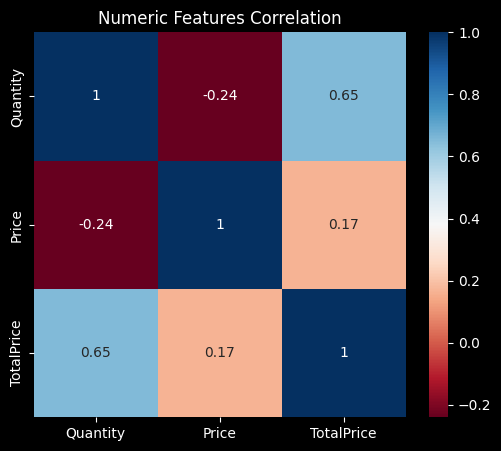

In [27]:
# Correlation heatmap for numeric features
corr = df[['Quantity','Price','TotalPrice']].corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='RdBu')
plt.title('Numeric Features Correlation')
plt.show()

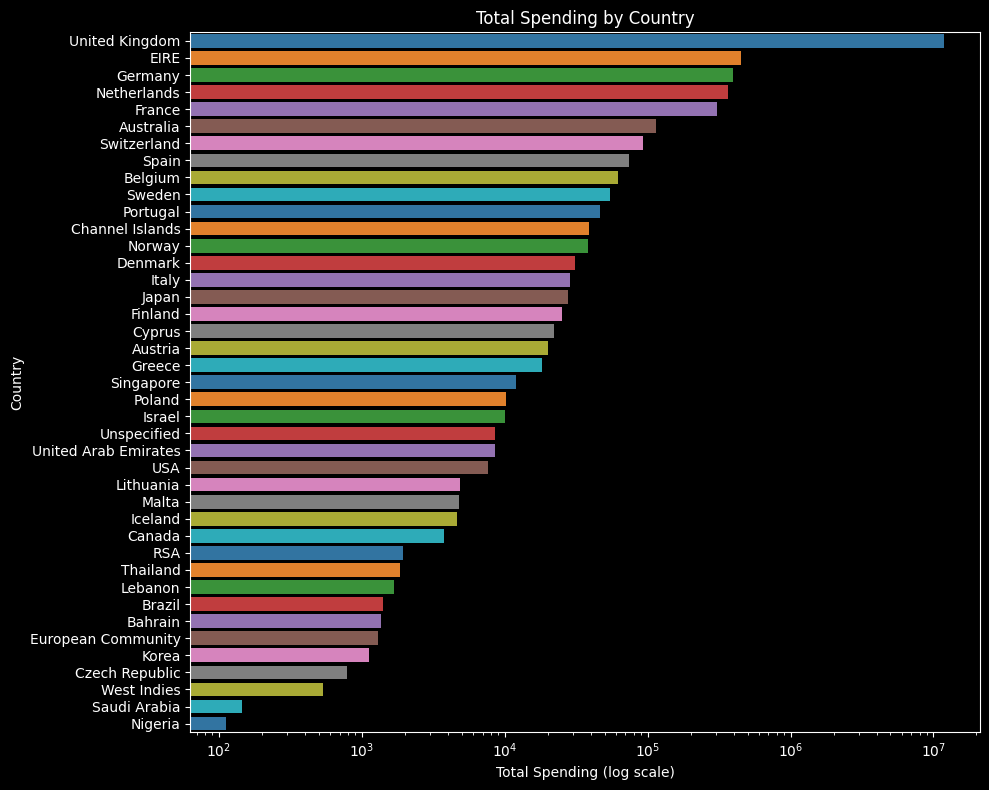

In [28]:
# Calculate total spending by country
country_spending = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)

# Bar chart
plt.figure(figsize=(10, 8))
sns.barplot(
    x=country_spending.values,
    y=country_spending.index,
    hue=country_spending.index,
    palette='tab10',
    dodge=False,
    legend=False
)
plt.xscale('log')
plt.title('Total Spending by Country')
plt.xlabel('Total Spending (log scale)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

In [29]:
# Format the numbers to show in standard notation (not scientific)
pd.set_option('display.float_format', '{:}'.format)
country_spending.head(10)

Country
United Kingdom   11870064.927
EIRE                451650.75
Germany            397886.581
Netherlands         366118.17
France              307106.62
Australia           113963.54
Switzerland          92617.53
Spain                74624.87
Belgium              61753.73
Sweden               54362.56
Name: TotalPrice, dtype: float64

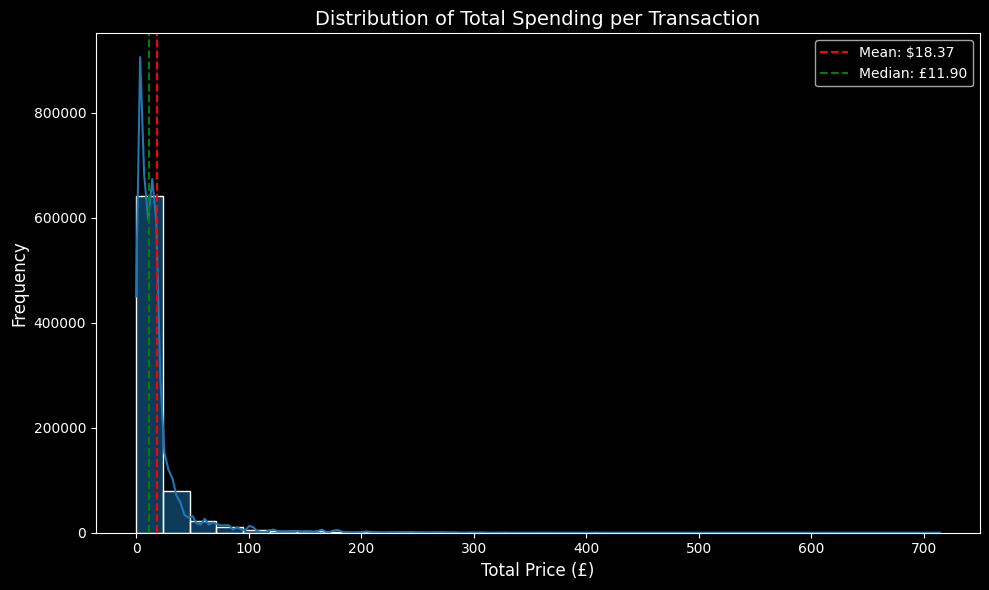

In [30]:
# Histogram of TotalPrice distribution
plt.figure(figsize=(10, 6))

sns.histplot(df['TotalPrice'], bins=30, kde=True, color='#1f77b4')
mean_price = df['TotalPrice'].mean()
median_price = df['TotalPrice'].median()
plt.axvline(mean_price, color='red', linestyle='--', label=f'Mean: ${mean_price:.2f}')
plt.axvline(median_price, color='green', linestyle='--', label=f'Median: £{median_price:.2f}')
plt.title('Distribution of Total Spending per Transaction', fontsize=14)
plt.xlabel('Total Price (£)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()

plt.tight_layout()
plt.show()

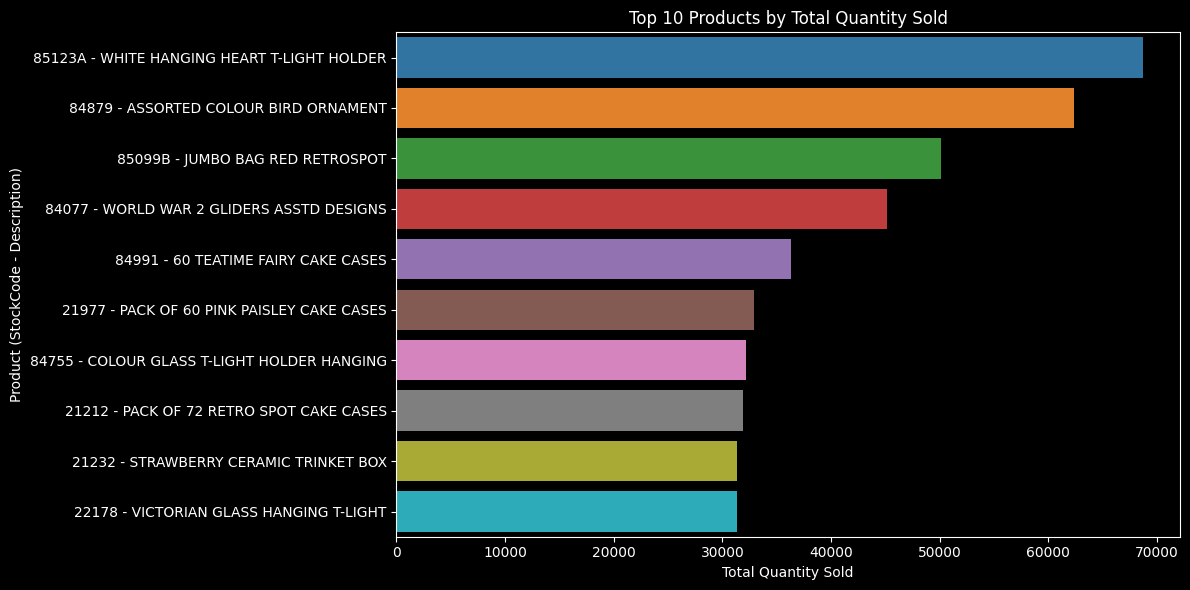

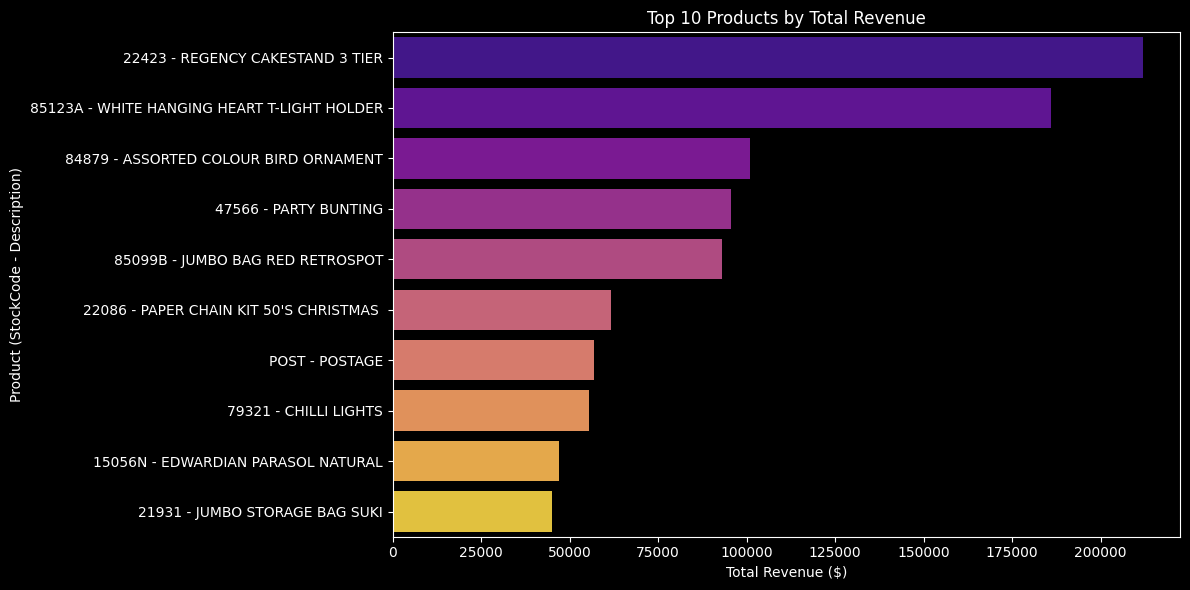

In [31]:
# 1. Visualize the top 10 products by total quantity sold
top_quantity = df.groupby(['StockCode', 'Description'])['Quantity'].sum().nlargest(10)
y_labels_qty = [f"{c} - {d}" for c, d in top_quantity.index]

plt.figure(figsize=(12, 6))
ax = sns.barplot(
       x=top_quantity.values,
       y=y_labels_qty,
       hue=y_labels_qty,
       palette='tab10',
       dodge=False,
       legend=False         
)
ax.set(title='Top 10 Products by Total Quantity Sold',
          xlabel='Total Quantity Sold',
          ylabel='Product (StockCode - Description)')
plt.tight_layout()
plt.show()

# 2. Visualize the top 10 products by total revenue
top_revenue = df.groupby(['StockCode', 'Description'])['TotalPrice'].sum().nlargest(10)
y_labels_rev = [f"{c} - {d}" for c, d in top_revenue.index]

plt.figure(figsize=(12, 6))
ax = sns.barplot(
       x=top_revenue.values,
       y=y_labels_rev,
       hue=y_labels_rev,    
       palette='plasma',
       dodge=False,
       legend=False
)
ax.set(title='Top 10 Products by Total Revenue',
          xlabel='Total Revenue ($)',
          ylabel='Product (StockCode - Description)')
plt.tight_layout()
plt.show()

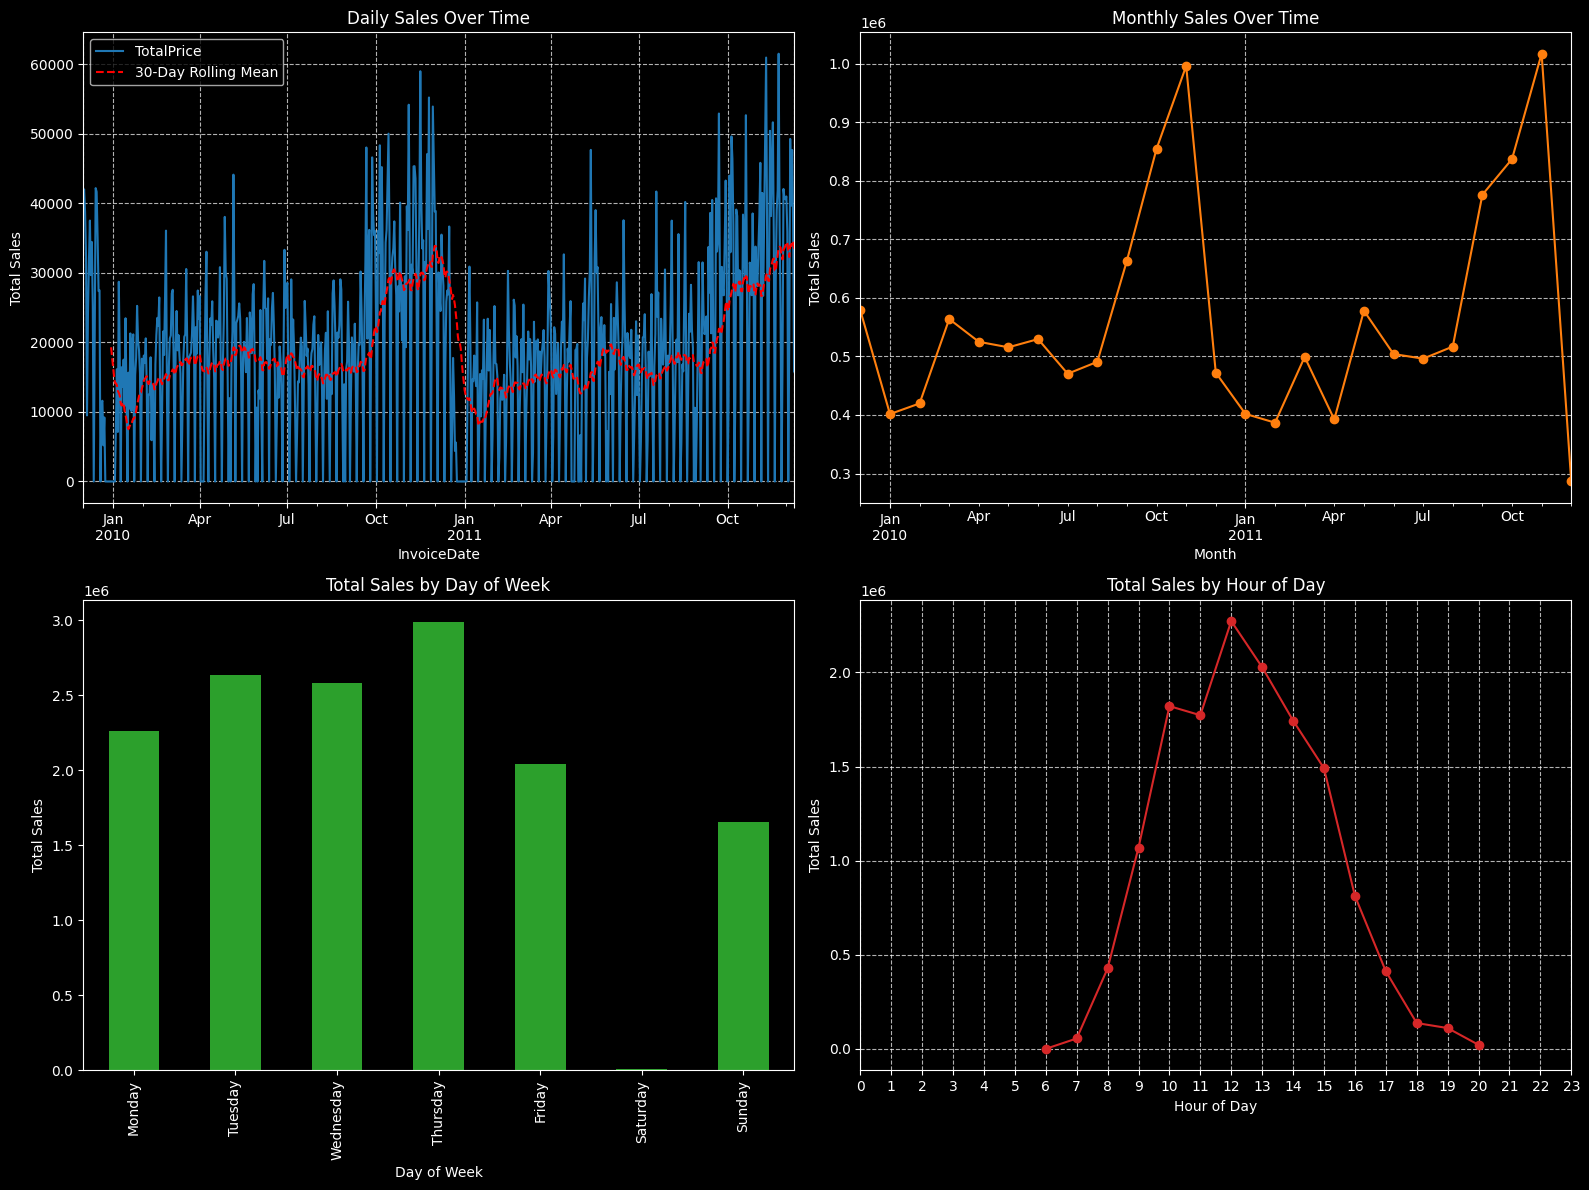

In [ ]:
# Visualize sales distribution over time
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Daily sales
daily_sales = df.set_index('InvoiceDate')['TotalPrice'].resample('D').sum()
daily_sales.plot(ax=axes[0,0], color='#1f77b4', title='Daily Sales Over Time',
                 ylabel='Total Sales',
                 xlabel='Date')
daily_sales.rolling(window=30).mean().plot(ax=axes[0,0], label='30-Day Rolling Mean', color='red', linestyle='--')
axes[0,0].grid(True, linestyle='--', alpha=0.7)
axes[0,0].legend()

# Monthly sales
df.set_index('InvoiceDate')['TotalPrice'].resample('ME').sum().plot(ax=axes[0,1], marker='o', color='#ff7f0e')
axes[0,1].set(title='Monthly Sales Over Time',
              ylabel='Total Sales',
              xlabel='Month')
axes[0,1].grid(True, linestyle='--', alpha=0.7)

# Sales by day of week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df.groupby(df['InvoiceDate'].dt.day_name())['TotalPrice'].sum().reindex(day_order).plot(kind='bar', ax=axes[1,0], color='#2ca02c')
axes[1,0].set(title='Total Sales by Day of Week',
              ylabel='Total Sales',
              xlabel='Day of Week')

# Sales by hour
df.groupby(df['InvoiceDate'].dt.hour)['TotalPrice'].sum().plot(kind='line', marker='o', ax=axes[1,1], color='#d62728')
axes[1,1].set(title='Total Sales by Hour of Day',
              ylabel='Total Sales',
              xlabel='Hour of Day',
              xticks=range(0, 24))
axes[1,1].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
